<a href="https://colab.research.google.com/github/amaanhash/Profanity-Filter-for-kids-using-video-sharing-platform/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

!unzip '/content/drive/MyDrive/archive (2).zip'

Archive:  /content/drive/MyDrive/archive (2).zip
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [9]:
BASE_DIR= '/content/UTKFace'
age_labels =[]
gender_labels=[]
image_paths = []

image_filenames =os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR,image)
  img_components =image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  #append the image_path,age_label and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)


  0%|          | 0/23708 [00:00<?, ?it/s]

In [10]:
import pandas as pd
df =pd.DataFrame()
df['image_path'],df['age'],df['gender'] = image_paths,age_labels,gender_labels
df.head(5)

,image_path,age,gender
0,/content/UTKFace/1_1_0_20170109194452834.jpg.c...,1,1
1,/content/UTKFace/1_1_0_20170109193026103.jpg.c...,1,1
2,/content/UTKFace/70_0_0_20170111201419254.jpg....,70,0
3,/content/UTKFace/44_0_0_20170117155532055.jpg....,44,0
4,/content/UTKFace/2_0_2_20161219222236983.jpg.c...,2,0


<Axes: xlabel='age', ylabel='Density'>

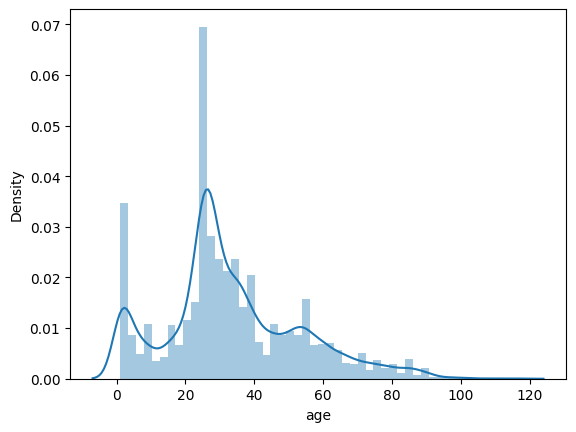

In [11]:
#Age distribution
sns.distplot(df['age'])

feature extraction

In [14]:
from PIL import Image
def extract_image_features(images):
  features = list()

  for image in tqdm(images):
    img = load_img(image,grayscale =True)
    img = img.resize((128,128),Image.ANTIALIAS)
    img = np.array(img)
    features.append(img)

  features =np.array(features)
  features = features.reshape(len(features),128,128,1)
  return features



In [15]:
X = extract_image_features(df['image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [16]:
X.shape

(23708, 128, 128, 1)

In [19]:
X = X /225.0

In [20]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [21]:
input_shape = (128,128,1)

In [ ]:
inputs =Input((input_shape))
conv_1 = Conv2D(32,kernel_size=(3,3),activation = 'relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64,kernel_size=(3,3),activation = 'relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128,kernel_size=(3,3),activation = 'relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256,kernel_size=(3,3),activation = 'relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(max_4)

#fully connected layers

dense_1 = Dense(256,activation ='relu')(flatten)
dense_2 = Dense(256,activation ='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1,activation = 'sigmoid',name='gender_out')(dropout_1)
output_2 = Dense(1,activation = 'relu',name='age')(dropout_2)

model = Model(inputs=[inputs],outputs = [output_1,output_2]

model.compile(loss=['binary_crossentropy','mae']
     optimizer = 'adam',metrics=['accuracies'])